<a href="https://colab.research.google.com/github/felstuff/BackToBasic/blob/master/TitanicExploratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install catboost

     |████████████████████████████████| 64.8MB 64kB/s 


"pip" like a software to install other scripts that's not in python

In [2]:
# Import Dependencies; 
%matplotlib inline 

# Start Python Imports 
import math, time, random, datetime

# Data Manipulation 
import numpy as np
import pandas as pd

# Visualisation 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use("seaborn-whitegrid")

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine Learning 
import catboost 
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Import train & test data
test = pd.read_csv('https://raw.githubusercontent.com/felstuff/titanic-test/master/titanic/test.csv')
train = pd.read_csv('https://raw.githubusercontent.com/felstuff/titanic-test/master/titanic/train.csv')
gender_submission = pd.read_csv('https://raw.githubusercontent.com/felstuff/titanic-test/cf3affb2301c420aade441d9c2844417cce165d2/titanic/gender_submission.csv')

In [4]:
# View the train dataset
train.head()
# "head" - only show up to 5 rows 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# To check the number of row AKA lenght of the dataset 
len(train)

891

In [6]:
# To view the test data (it shd have the same number of columns as the train dataset)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
len(test)
# Cannot have two functions in the same "code block" coz only the last function will show 

418

In [8]:
# Viewing of the gender_submission dataset
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


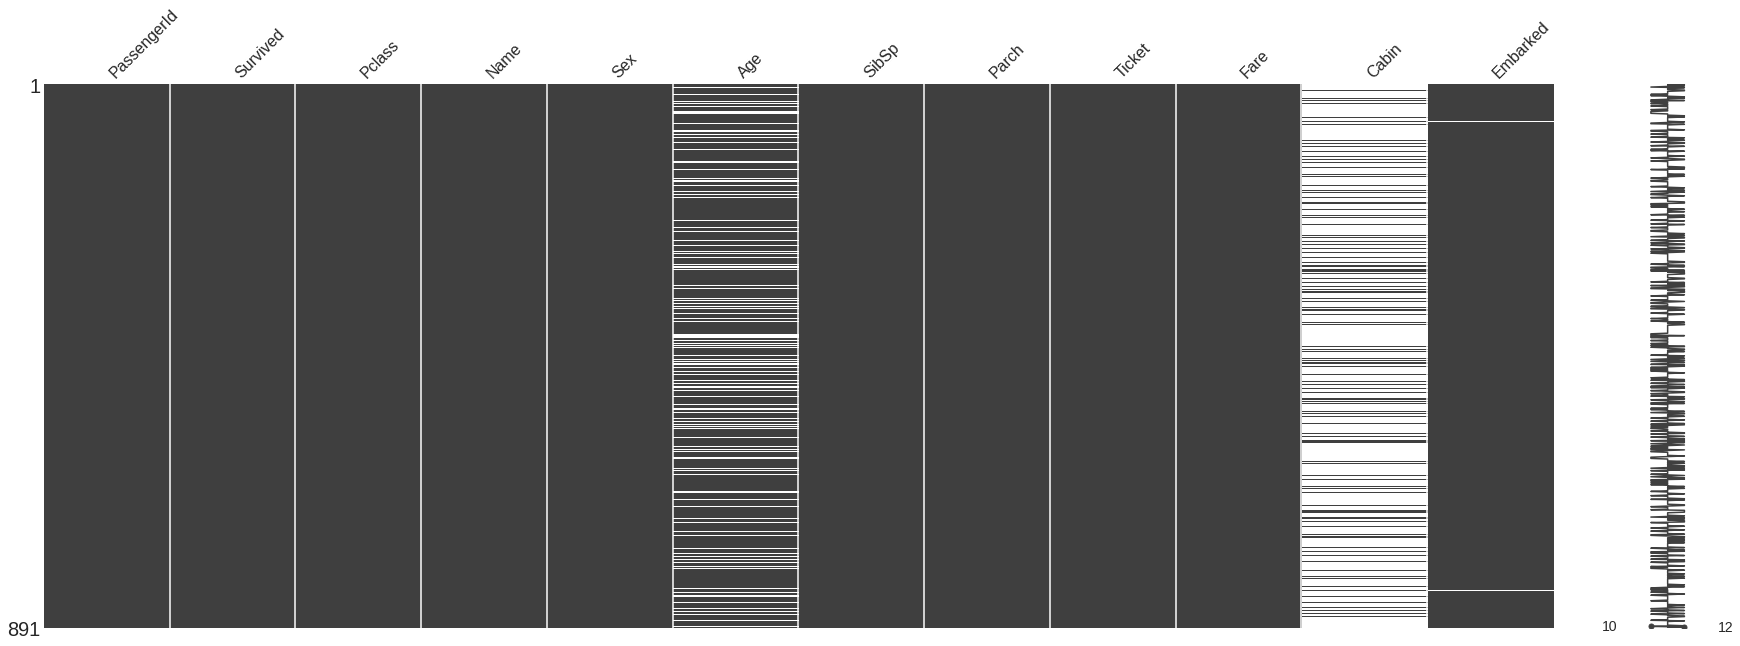

In [9]:
# 'missingno' is the script that will help you identify what are the missing data fr the dataset, and plot the result in a bar chart.
# The lesser the white lines = the cleaner the data is, the best is to have jst black bar


missingno.matrix(train, figsize = (30,10)) 

In [10]:
# Function to show how many missing values there are
def find_missing_values(df, columns):
  '''
  Finds no of rows where certain columns are missing values
  :: param df :: = target dataframe
  :: param columns :: = list of columns
  '''
  missing_vals = {}
  print('Number of missing or NaN values for each column: ')
  df_length = len(df)
  for col in columns:
    total_column_values = df[col].value_counts().sum()
    missing_vals[col] = df_length - total_column_values
  return missing_vals

find_missing_values(train, columns=train.columns)
# This is NOT the most productive code, see next block of code as alternative 

Number of missing or NaN values for each column: 


{'Age': 177,
 'Cabin': 687,
 'Embarked': 2,
 'Fare': 0,
 'Name': 0,
 'Parch': 0,
 'PassengerId': 0,
 'Pclass': 0,
 'Sex': 0,
 'SibSp': 0,
 'Survived': 0,
 'Ticket': 0}

In [11]:
train.isnull().sum()
#this is a more efficient code to run to find missing value instead of code line #16

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

This portion is to go through the individual column to see what they contain. In **two types** of analysis: 
**1)** Discretised Continuous Varibles - the whole range, but broken into sub range/bucket/bin 
i.e. 

**1)** - 100 #and all the numbers in btw, but if you apply Discretised Continuous Varibles to it,it means - 1 - 10 is one range/bucket/bin, then from 10 - 20 is another range/bucket/bin so on and so forth.

**2)** Continuous Varibles 

In [12]:
df_bin = pd.DataFrame() # for Discretised contiunious varible 
df_con = pd.DataFrame() # for contiunious varible 

In [13]:
train.dtypes # to check the nature of the data type in the dataset 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Always remember how the dataframe looks like what information is there. Always **stay focus on the prize** AKA what you wanna achieve from this dataset

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


** Excerise 1 - find out how many people survive the crash and other things abt the survivors**

0    549
1    342
Name: Survived, dtype: int64


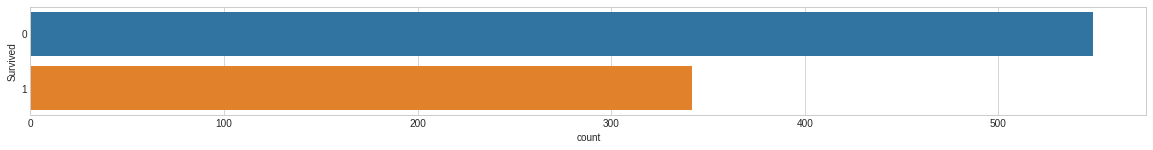

In [15]:
fig = plt.figure(figsize=(20,2)) #it's the size/ratio of the chart that's to be displayed; if you dont input anything they will give you defult  
sns.countplot(y='Survived', data=train)
print (train.Survived.value_counts())


In [16]:
df_bin['Survived'] = train["Survived"]
df_con['Survived'] = train["Survived"]

In [17]:
df_bin.head() #head is to display, and it's only for the 5 rows 

,Survived
0,0
1,1
2,1
3,1
4,0


In [18]:
df_con.head()

,Survived
0,0
1,1
2,1
3,1
4,0


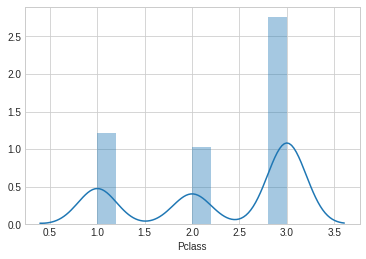

In [19]:
sns.distplot(train.Pclass)

In [20]:
df_bin['Pclass'] = train["Pclass"]
df_con['Pclass'] = train["Pclass"]

In [21]:
df_con.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


In [22]:
#how many different names are there? 
train.Name.value_counts()

Seward, Mr. Frederic Kimber                1
Sawyer, Mr. Frederick Charles              1
Olsen, Mr. Ole Martin                      1
Hood, Mr. Ambrose Jr                       1
Badt, Mr. Mohamed                          1
                                          ..
Fortune, Miss. Mabel Helen                 1
Harrington, Mr. Charles H                  1
Ilett, Miss. Bertha                        1
Meek, Mrs. Thomas (Annie Louise Rowley)    1
Harder, Mr. George Achilles                1
Name: Name, Length: 891, dtype: int64

In [23]:
len(train)

891

can try to find other things the names have in common; but for the purpose of the time, it's not explored here on this excerise 
Tips: use passgeners last name

**Gender**

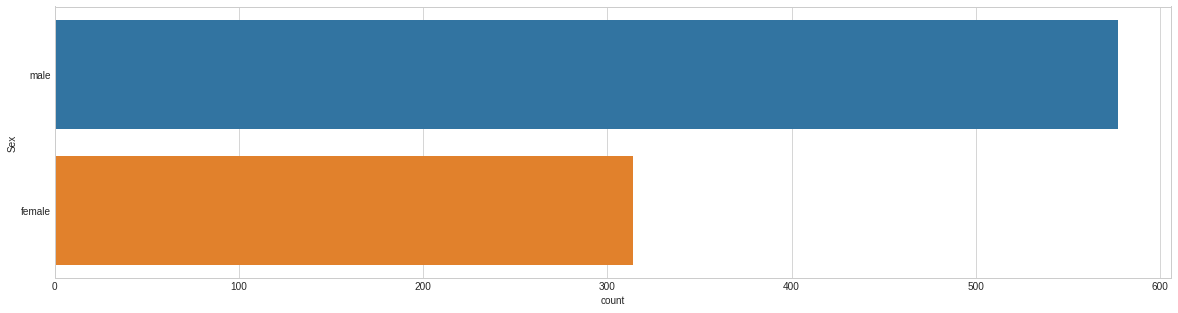

In [24]:
#visiting the distribution of the gender 
plt.figure(figsize=(20,5))
sns.countplot(y='Sex', data=train);

In [25]:
train.Sex.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [26]:

# no missing values, so we can add them to our subset df
df_bin['Sex'] = train['Sex']

# converting the true/false to 1 OR 0
df_bin['Sex'] = np.where(df_bin['Sex'] == 'female',1,0)
df_con['Sex'] = train['Sex']


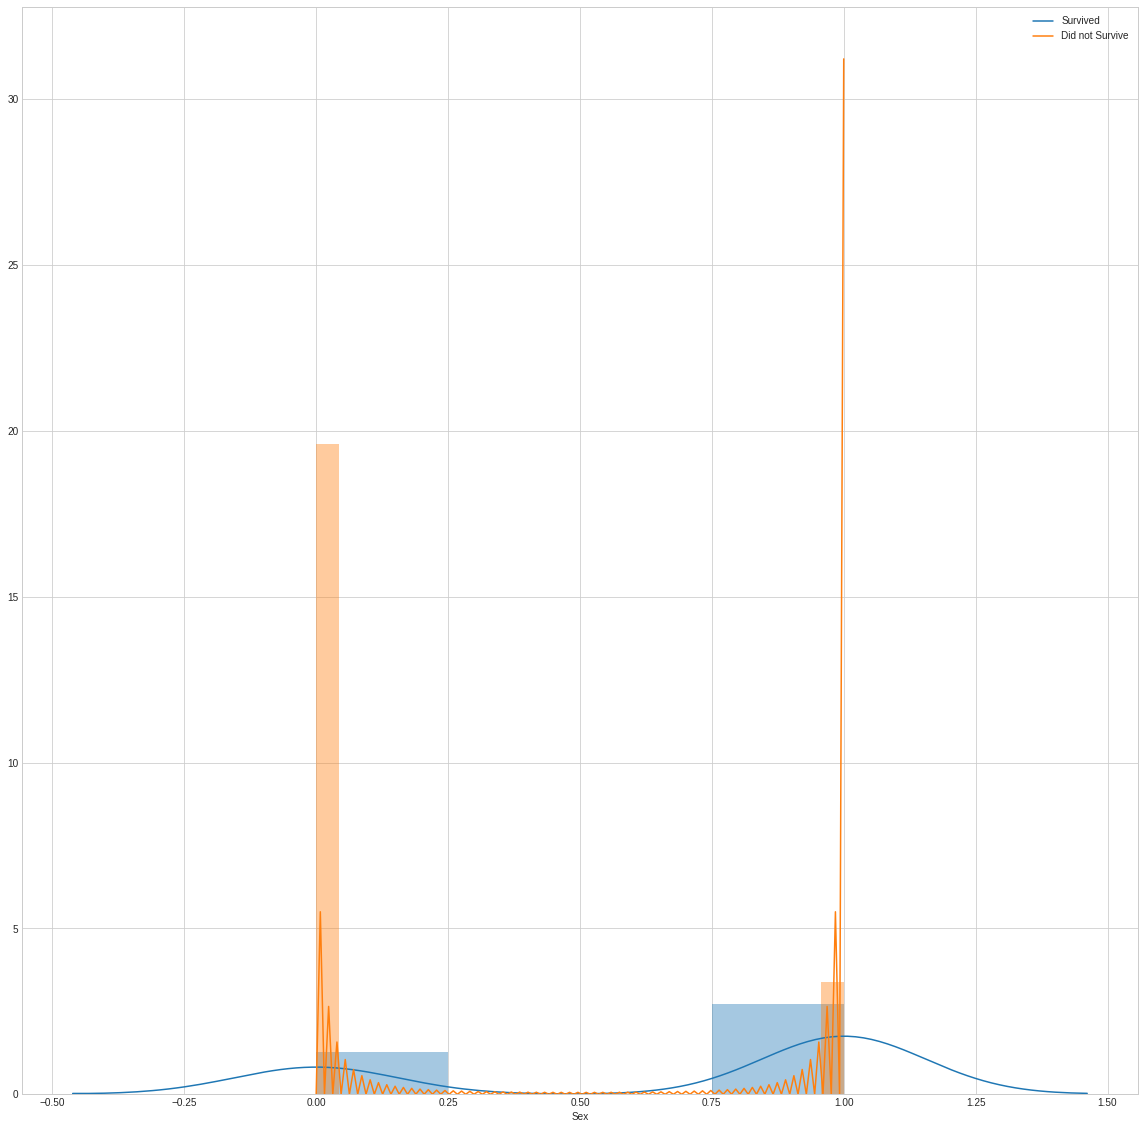

In [27]:
# to find out the co relationship with sex and survival 
# we can do this coz both are boolean/binarys
fig = plt.figure (figsize=(20,20))

sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Sex'], kde_kws={'label': 'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Sex'], kde_kws={'label': 'Did not Survive'});

## *Challenge: * 

how wld you fill the missing data of the age column?!

In [28]:
# Once the age data has been fixed up; we can then add it to our sub dataframe 
# df_bin['Age'] = pd.cut(train['Age'], 10)  # bucketed/binned into different categories 
# df_con['Age'] = train['Age'] #non bucketed 

### **Feature: SibSp**

Description: The Number of sibilings/spouse the passenger has on board 

In [29]:
#for graphing purpose. will need to define 'plot_count_dist' otherwise subsequence code wld not show

def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20,5), use_bin_df=False):
  if use_bin_df:
    fig = plt.figure(figsize=figsize)
    plt.subplot(1,2,1)
    sns.countplot( y=target_column, data=bin_df )
    plt.subplot(1,2,2)
    sns.distplot( data.loc[ data[label_column] == 1 ][ target_column ], kde_kws={'label': 'Survived'} )
    sns.distplot( data.loc[ data[label_column] == 0 ][ target_column ], kde_kws={'label': 'Dead'} )
  else:
    fig = plt.figure(figsize=figsize)
    plt.subplot(1,2,1)
    sns.countplot( y=target_column, data=data )
    plt.subplot(1,2,2)
    sns.distplot( data.loc[ data[label_column] == 1 ][ target_column ], kde_kws={'label': 'Survived'} )
    sns.distplot( data.loc[ data[label_column] == 0 ][ target_column ], kde_kws={'label': 'Dead'} )

In [30]:
# missing value does SiBSp has?
train.SibSp.value_counts() 

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [31]:
# Add SibSp to subset dataframes
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train ['SibSp']

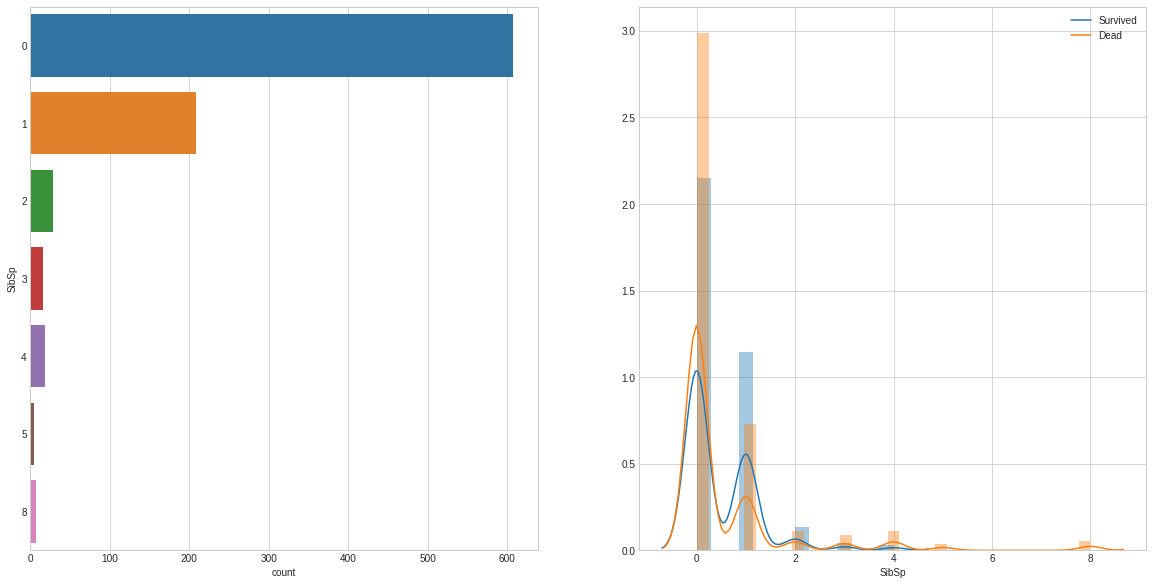

In [32]:
#Visualise the Counts of the SibSp and the distribution of the values against those who survived

plot_count_dist(train,
                bin_df=df_bin,
                label_column='Survived',
                target_column='SibSp',
                figsize =(20,10))




In [33]:
df_bin['SibSp'] = pd.cut(train['SibSp'], 10) 
df_con['SibSp'] = train['SibSp']

# Feature: Parch 
Description: the number of parents/ children the passenger has on board the TItanic

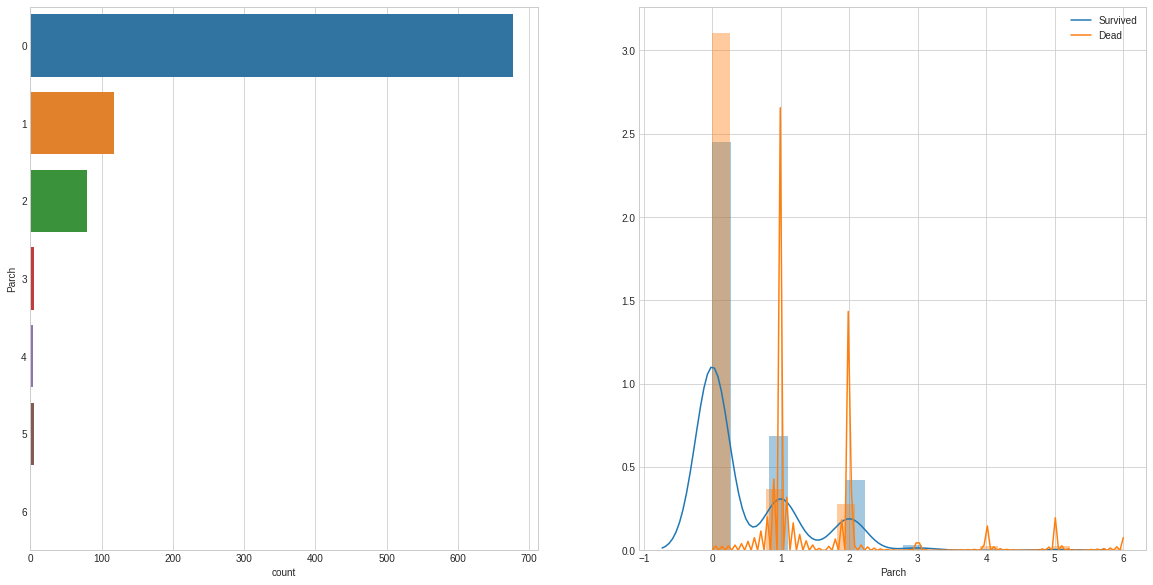

In [34]:
#Visualise the Counts of the Parch and the distribution of the values against those who survived

plot_count_dist(train,
                bin_df=df_bin,
                label_column='Survived',
                target_column='Parch',
                figsize =(20,10))


In [35]:
df_bin['Parch'] = pd.cut(train['Parch'], 10) 
df_con['Parch'] = train['Parch']

In [36]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch
0,0,3,male,1,0
1,1,1,female,1,0
2,1,3,female,0,0
3,1,1,female,1,0
4,0,3,male,0,0


# Feature: Ticket 
Description - the ticket number of the boarding passenger 

In [37]:
# How many kind of tickets are there?
train.Ticket.value_counts()[:20]

347082          7
CA. 2343        7
1601            7
347088          6
CA 2144         6
3101295         6
382652          5
S.O.C. 14879    5
4133            4
2666            4
LINE            4
113781          4
W./C. 6608      4
19950           4
113760          4
347077          4
17421           4
PC 17757        4
349909          4
24160           3
Name: Ticket, dtype: int64

In [38]:
# How many unique kinds of Tickets are there? 
print("There are {} unique Ticket values." . format(len(train.Ticket.unique())))

There are 681 unique Ticket values.


too many unique values hence wldnt be able to value add to the analysis. This column of data is also knows as high-dimensional variable 

# Feature: Fare
Description - how much the ticket cost

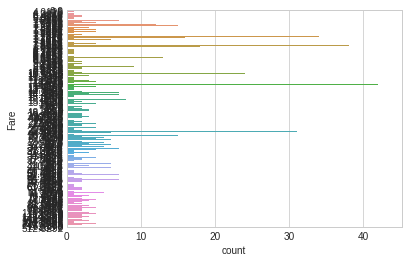

In [39]:
# How many different values of the fare are there?
sns.countplot(y="Fare", data=train);

In [40]:
# What kind of varibale is Fare? 
train.Fare.dtype

dtype('float64')

In [41]:
# How many unique kinds of Tickets are there? 
print("There are {} unique Fare values." . format(len(train.Fare.unique())))

There are 248 unique Fare values.


becuase Fare if a float(numbers with decimal pts) let's add it to our contiunous sub dataframe but to add it to our catergorical sub dataframe, we will not cut it into bins. 

In [42]:
# Adding Fare to sub dataframe
df_con['Fare'] = train['Fare'] # discretised 
df_bin['Fare'] = pd.cut(train['Fare'], bins =5)


In [43]:
df_bin.Fare.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

In [44]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,male,1,0,7.2500
1,1,1,female,1,0,71.2833
2,1,3,female,0,0,7.9250
3,1,1,female,1,0,53.1000
4,0,3,male,0,0,8.0500


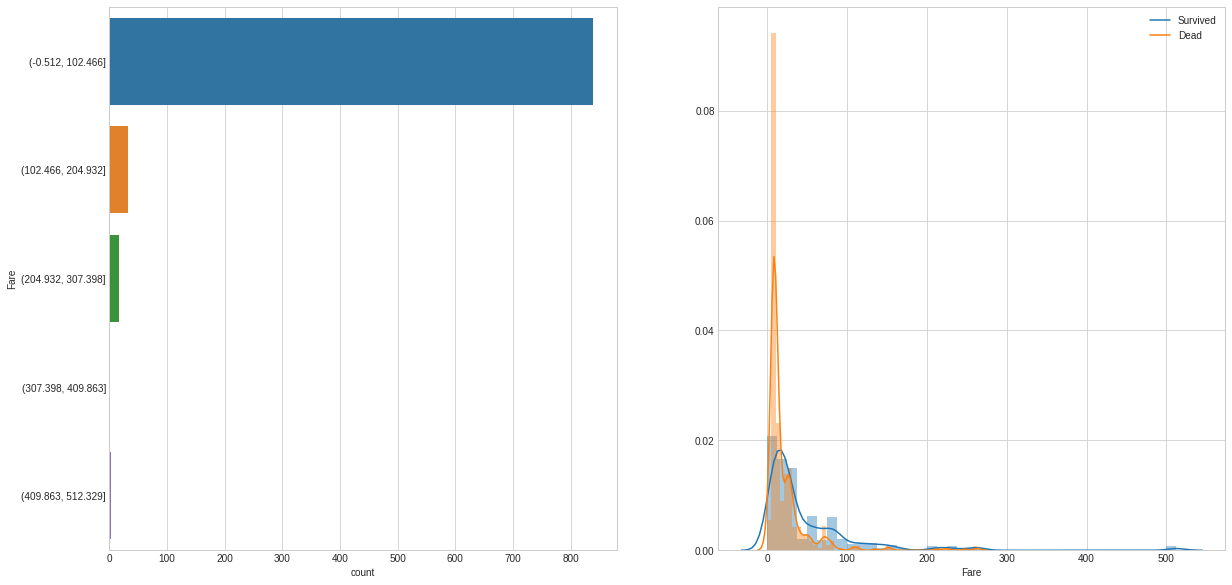

In [45]:
# visualise the Fare bin counts as well as the Fare distribution vs Survived.

plot_count_dist(train,
                bin_df=df_bin,
                label_column='Survived',
                target_column='Fare',
                figsize =(20,10),
                use_bin_df = True)

Challenge - How would you change the fare bins?

# Feature: Cabin 
Description: The cabin number of the passengers

In [46]:
# What do the cabin values look like?
train.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
E101           3
F2             3
              ..
C110           1
C85            1
D30            1
D21            1
D46            1
Name: Cabin, Length: 147, dtype: int64

Wld not be using this set of data becuase there's too many missing values.
Food for thought: Is there any way to clean up this set of Cabin values to be more usable? 

# Feature : Embarked

Description - the port where the passenger boarded Titanic 

Key: 
C = Cherbourg
Q = Queenstown
S = Southampton 

In [47]:
train.Embarked.value_counts()
#mindful that there're 3 locations that the passenger boarded 

S    644
C    168
Q     77
Name: Embarked, dtype: int64

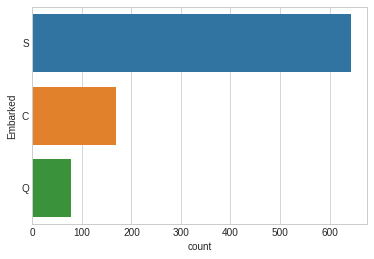

In [48]:
#What kind of value are in Embarked?
sns.countplot(y='Embarked', data=train);

In [49]:
#add emarked to sub dataframe
df_con['Embarked'] = train['Embarked'] # discretised 
df_bin['Embarked'] = train['Embarked']

In [50]:
df_con = df_con.dropna( subset=['Embarked'] )

for the purpose of this excerise, it wld be best to jst remove that two rows, rather then to randomly assign embarked location.

In [51]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,"(0.8, 1.6]","(-0.006, 0.6]","(-0.512, 102.466]",S
1,1,1,1,"(0.8, 1.6]","(-0.006, 0.6]","(-0.512, 102.466]",C
2,1,3,1,"(-0.008, 0.8]","(-0.006, 0.6]","(-0.512, 102.466]",S
3,1,1,1,"(0.8, 1.6]","(-0.006, 0.6]","(-0.512, 102.466]",S
4,0,3,0,"(-0.008, 0.8]","(-0.006, 0.6]","(-0.512, 102.466]",S


In [53]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


# Feature Encoding 
Will encode the features, so that they're ready to be used for machine learning models. 
Encode our binned dataframe (df_bin)with one-hot encoding and continunous dataframe (df_con) with label encoding funcation from sklearn 

In [54]:
#one hot encode binned variables 
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_esc = pd.get_dummies (df_bin, columns=one_hot_cols)

df_bin_esc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,"SibSp_(-0.008, 0.8]","SibSp_(0.8, 1.6]","SibSp_(1.6, 2.4]","SibSp_(2.4, 3.2]","SibSp_(3.2, 4.0]","SibSp_(4.0, 4.8]","SibSp_(4.8, 5.6]","SibSp_(5.6, 6.4]","SibSp_(6.4, 7.2]","SibSp_(7.2, 8.0]","Parch_(-0.006, 0.6]","Parch_(0.6, 1.2]","Parch_(1.2, 1.8]","Parch_(1.8, 2.4]","Parch_(2.4, 3.0]","Parch_(3.0, 3.6]","Parch_(3.6, 4.2]","Parch_(4.2, 4.8]","Parch_(4.8, 5.4]","Parch_(5.4, 6.0]","Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [55]:
# label encode all continuous values using LabelEncode()
df_con_esc = df_con.apply(LabelEncoder().fit_transform)

df_con_esc.head(20)


,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,2,1,1,0,18,2
1,1,0,0,1,0,207,0
2,1,2,0,0,0,41,2
3,1,0,0,1,0,189,2
4,0,2,1,0,0,43,2
5,0,2,1,0,0,51,1
6,0,0,1,0,0,186,2
7,0,2,1,3,1,124,2
8,1,2,0,0,2,74,2
9,1,1,0,1,0,154,0


# Start Building Machine Learning Models

Now our data has been manipulated and coverted into numbers, we can run a series of different machine learning over it to find which yield the best result. 

**Let's Seperate the data**

In [56]:
#Split the dataframe into data and labels 
selected_df = df_con_esc
#coz we have already prepared df_con_esc... we're jst gonna rename it for this ML, you can use the "bin" dataset for this exercise as well 

In [57]:
#Split the dataframe into data and Labels
X_train = selected_df.drop('Survived', axis=1)  #data
Y_train = selected_df.Survived #label 


# Define a function to Fit Machine Learning Algorithms 
Since many of the algorithms we will use from the sklearn library, they all take similar (parctically the same) inputs and produce similar outputs. To prevent writing code mlutiple times, we will functionise fitting the model and returning the accuracy scores. 

In [58]:
# Funcation that runs the requested algorithm and accuracy metrics
def fit_ml_algo (algo, X_train, Y_train, cv):
  
  #one pass 
  model = algo.fit(X_train, Y_train)
  acc = round(model.score(X_train, Y_train) * 100,2) 
  #round is to round up the figure and the format is "round(number, digits)", and
  #in this formula "(model.score(X_train, Y_train) * 100" is the number, and 
  #"2" is the digits

  #Cross Validation  
  train_pred = model_selection.cross_val_predict (algo,
                                                  X_train,
                                                  Y-train,
                                                  cv=cv,
                                                  n_jobs = -1)
  
  # Cross Validation accuracy metric 
  acc_cv = round(metrics.accuracy_accuracy_score(Y_train, train_pred) * 100,2)

  return train_pred, acc, acc_cv

  #cv = cross validation